# Project problem : 

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements.We have the  measurements of the iris flowers according to
their species,and the  task is to train a machine learning model that can learn from the
measurements of the iris species and to  classify them.


## plan / overview of what i am going to do: 
1. **importing libraries** :
        * import pandas : which is a python library for data analysis 
        * import numbpy 
        * import matplotlib.pyplot as plt : which is a python library for creating graphs and charts 
        * import machine learning algorithms : its difficutl to decide waht algorithms to choose hence i created this flowchart to help make decisions: 
       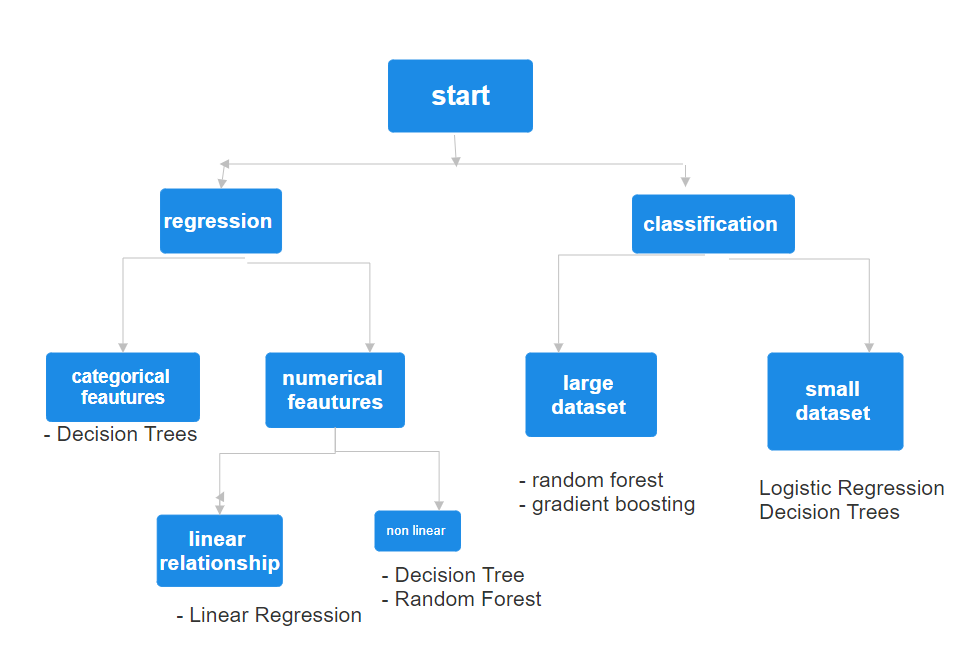 
2. **reading the file and Exploratory data analysis**: 
    * read file in : pd.read_csv() 
    * Initial stats : df.head() (for first 5 rows) , df.info() to check data type, non-null values etc.) , df.shape (no.rows and columns), df.describe()
    * null and duplicates: .isnull() or .isnull().sum, .duplicated or .duplicated().sum()
3. **data wrangling**: 
    * cleaning the data so filling in missing values etc. 
    * .loc , .iloc 
4. **plt and sns**
    * creating a bunch of charts to see what is going on: 
    * looking at distributions of each cateogry: plt.hist() 
    * comparing categoies against each other : plt.scatter 
5. **correlation heatmap** : 
    * graphical representation of the correlation coefficients between variables in a dataset where -1<r<1, uses colour to indicate strength and direction of relationships. (-1  = negative correlation, 1 = positive correlation) 

6. **feature engineering and data preprocessing** : 
    * categorical encoding -  converting categories into numerical values for ml training as computer don’t understand categorical data  i.e Iris-setosa is encoded as 0 Iris-versicolor is encoded as 1 , Iris-virginica is encoded as 2 
     * choosing features (x)  and target (y)  
     * splitting data into training and testing data: 
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)
7. **ML model** : 
    * Intialise model : i.e classifier = RandomForestClassifier(n_estimators=100, random_state=42)
     * Fit model to training data : model.fit(X_train, y_train)
     * Make predictions : .predict 
      * Evaluate model:
8. **maybe look at cross validation and hyperaparameter tyring and trees 




## Let's Start !!! 

### 1. Importing libraries 

In [50]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

### 2. reading the file and Exploratory data analysis 

remember : 
    - to copy file path (shift right click) 
    - type in r before pasting in link 

In [22]:
df = pd.read_csv(r"C:\Users\maies\Desktop\oasis infobyte internship\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [25]:
df.shape

(150, 6)

In [26]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [27]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [28]:
df.duplicated().sum()

0

### 3. Data Wrangling 

* there isn't much to do as the dataset is pretty clean so we can simply drop the first column as we don't need that  or we can leave it 

In [49]:
data=df.iloc[:,1:]
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 4. Plt and SNS 

    * first i'm going to look at the individual distributions of categories i.e Sepal width adn length distribution, Petal width and length distribution 
    * then im going to create scatter plot to compare variables: Sepal width vs petal width, sepal length vs petal length, petal length vs petal width , sepal length vs sepal width 

### 5. Correlation heatmap 

C:\Users\maies\AppData\Local\Temp\ipykernel_6596\2824369377.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


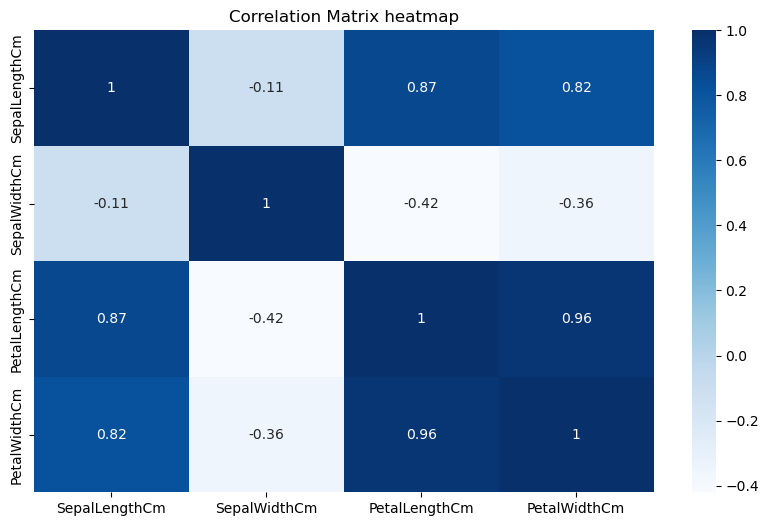

In [38]:
corr_matrix = data.corr()

# Plotting Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

### 6. Data preprocessing and Feature engineering 


#### steps to  label encoding : 
    1.  identify categorical columns 
    2.  create a label encoder : use LabelEncoder() from the sklearn.preprocessing library 
    3.  Fit and Transform : Apply fit_transform method to cateogrical column. this maps a category to a number 
    4. check unique cateogies to see if everything has been encoded correctly 
    5.  replace categorical column with encoded valuees 

In [41]:
# 1. our categorical column is data['Species']
# 2. create a label encoder 
le = LabelEncoder() 

#3. fit and transform method 
data['Species'] = le.fit_transform(data['Species'])
# 4. checking unique values 
unique_species = data['Species'].unique()

print("Encoded flower Values:")
print(unique_species)

Encoded flower Values:
[0 1 2]


#### data preprocessing : 
        1. defining features x and target y 
        2. splitting data into training and testing data 

In [47]:
x= data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

### 7. ML model 
    * Intialise model : i.e classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    * Fit model to training data : model.fit(X_train, y_train)
    * Make predictions : y_pred = model.predict(X_test) 
    * Evaluate model: accuracy_score(y_test, y_pred) 

In [52]:
#let's implement logisitc regression 
# initialise model 
model = LogisticRegression()

#fit model to training data 
model.fit(x_train, y_train)

#make predictions 
y_pred = model.predict(x_test) 

#evaluate model 
accuracy = accuracy_score(y_test, y_pred) 
accuracy

0.9333333333333333

In [54]:
# Let's implement Decision Tree classifier 
#initialise model 
model2 = DecisionTreeClassifier()

#fit model to training data 
model2.fit(x_train, y_train) 

# make predictions 
y2_pred = model2.predict(x_test) 

# evaluate model 
accuracy2 = accuracy_score(y_test, y2_pred)
accuracy2

0.9333333333333333